# Gaussian Mixture Model (GMM)

GMM can be used for anomaly detection, density estimation and clustering. It is a probabilistic model that uses several Gaussian distributions (i.e. bell curves) and assumes instances falls within a given distribution. 

You can use Sci-kit Learn's sklearn.mixture.GaussianMixture, where you are required to specify the number $k$ Gaussian distributions (n_components).

The dataset <b>X</b> is picked randomly among $k$ clusters. The probability of a cluster is defined by using $\phi^{(j)}$, the cluster's weight, where $j$ is the selected cluster.
The location of the instance is sampled randomly in the Gaussian Distribution with <b>mean</b>, $\mu^{(j)}$, and the <b>Covariance Matrix </b>, $\Sigma^{(j)}$. The covariance matrix contains the dataset's variances (along a given axis) diagonally (i.e. the 'spread' in the data of a given feature). The values of the covariance are discussed within the notebook. 

The weight vector, $\phi$ - $\phi^{(1)}$ to $\phi^{(k)}$ - is applied to each random variable from $z^1$ to $z^m$. A categorical distribution defines $z^i$, which in turn uses the associated mean, $\phi^{(i)}$, and Covariance Matrix, $\Sigma^{(i)}$, to find the probability that $x^i$ belongs to that cluster.

<b>X</b> - are known instances and are called <i>observed variables</i>.

<b>$z^i$</b> - are unknown random variables and are called <i>latent variables</i>.


https://www.youtube.com/watch?v=DODphRRL79c

In [1]:
#Load blobs

from sklearn.datasets import make_blobs
import numpy as np

#Create 2 blobs
X1, y1 = make_blobs(random_state = 42, n_samples=1000, centers= ((2, -2), (0, 0)))
X1 = X1.dot(np.array([[0.2, 0.9], [0.9, 0.2]]))
#create a small plot
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
#merge both these clusters together, row wise.
X = np.r_[X1, X2]
y = np.r_[y1, y2]
X
y

array([1, 1, 0, ..., 0, 0, 0])

(-4.184034449976794, 7.081764977563407, -2.694533476532757, 5.227091480538079)

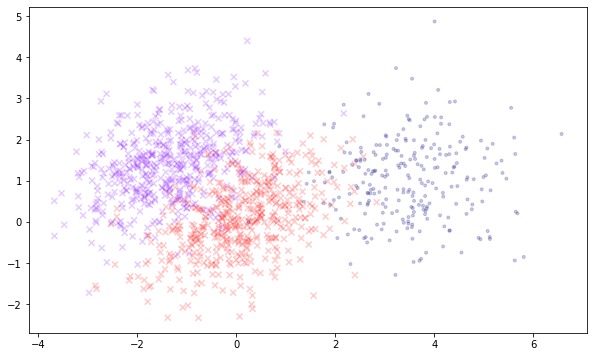

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 6))
plt.scatter(X1[:,0], X1[:,1], alpha=0.2, c=y1, marker='x', cmap='rainbow')
plt.scatter(X2[:,0], X2[:,1], alpha=0.2, c=y2, marker='.', cmap= 'jet')
plt.axis('on')

In [3]:
from sklearn.mixture import GaussianMixture

#n_init is the number of initializations to perform, GMM may converge to poor solutions!
#So make sure you set n_init, the default is 1.
#n_components - number of clusters
gm = GaussianMixture(n_components= 3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [4]:
gm.weights_ #phi, the weights vector, for the k clusters

array([0.39462799, 0.21369485, 0.39167716])

In [5]:
gm.means_ #mu, the means matrix, i.e. the centroid, pretty close to the actual values

array([[ 0.01448239,  0.06790076],
       [ 3.37557715,  1.00774782],
       [-1.38302219,  1.42356081]])

In [6]:
gm.covariances_ #Sigma, the covariance matrix

array([[[0.87132298, 0.37563997],
        [0.37563997, 0.79336113]],

       [[1.15999973, 0.05643165],
        [0.05643165, 0.96462409]],

       [[0.80094821, 0.31359194],
        [0.31359194, 0.7655363 ]]])

###### Weights Matrix - The values within the Vector shows the weights vectors applied to $z^k$.
###### Mean Matrix - The values within the Matrix shows the centroid or the mean of the clusters (i.e. cluster centres).
###### Covariance Matrix - The values within the Matrix shows the orientation, size and shape of the clusters.
 
 
#### The GaussianMixture class relies on the <u> Expectation Maximization (EM) algorithm</u>
The EM is very similiar to the kmeans algorithm. It first assigns the cluster parameters randomly, then repeats the following until convergence:
1. Assigns instances to clusters; called the <b>'Expectation step'</b>, using soft cluster assignments rather than hard cluster assignment unlike Kmeans (i.e. keep them off the road)  
2. Updates the clustering by using the weights and probabilities that an instance belongs to a cluster; called the <b>'Maxization step'</b>. The probabilities are called <i>responsibilities</i> of the clusters for the instances. 

In [7]:
gm.converged_ #has the GMM converged

True

In [8]:
gm.n_init #number of initializations

10

In [9]:
gm.n_iter_#number of iterations took to converge

4

In [10]:
# Now that you have the Weight vector, Mu mean matrix and Covariance Matrix - orientation, shape, size and relative weights
# You can find the cluster for new instances using Hard and Soft clustering.


#Hard clustering using .predict() method
print('Hard Clustering')
print(gm.predict(X))

#Soft clustering using .predict_proba() method
print('Soft Clustering')
print(gm.predict_proba(X))

Hard Clustering
[0 2 2 ... 1 1 1]
Soft Clustering
[[9.31806874e-01 3.32499377e-02 3.49431887e-02]
 [4.36135218e-01 3.69118086e-03 5.60173601e-01]
 [4.36798409e-01 1.86177519e-05 5.63182973e-01]
 ...
 [1.54342155e-02 9.84565127e-01 6.57095167e-07]
 [3.01323644e-05 9.99969868e-01 4.50638678e-11]
 [5.47045187e-04 9.99452954e-01 3.69555421e-10]]


In [11]:
# you can gather new instances by using .sample()

X_new, y_new = gm.sample(10)
X_new

array([[-1.20235141,  0.35357005],
       [ 0.31149875,  0.12311633],
       [-1.62221075, -0.71098165],
       [ 3.73025097,  1.65017789],
       [ 3.97831356,  0.69948787],
       [ 3.60497263, -0.86092564],
       [ 5.32354469,  0.96270601],
       [ 4.35678515,  1.58781045],
       [-0.02727097,  1.37388381],
       [-2.39261513,  0.25657823]])

In [12]:
y_new

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [13]:
#you find the densities of a given instance by using the score_samples()
#this outputs a negative number - don't forget Sci-kit learn's rule = Greater is better. 
#Finding the exponential of these scores gives the PDF not the probailities. To find the probability you will need to 
#integrate over a space. 

gm.score_samples(X_new)

array([-2.9476027 , -2.50956436, -3.84390366, -3.6920171 , -3.65153177,
       -5.29537291, -5.08161389, -3.99806527, -3.1577914 , -3.51127416])

Let me prove that integrating over all the instances gives 1. 

In [14]:
import numpy as np

resolution = 100 #the integral batch 
grid = np.arange(-10, 10, 1/resolution) #create vector of values

xx, yy = np.meshgrid(grid, grid) #xx is the columns from -10 to 10, and yy is the rows from -10 to 10 
# xx.shape # - 2000 x 2000 matrix

#xx.ravel().shape - 2,000 x 2,000 = 4,000,000 column vector
#xx.ravel() flattens the array, same as .reshape(-1, 1)

#np.vstack, stacks the matrix one top of another
X_full = np.vstack([xx.ravel(), yy.ravel()]).T #.T transposes the matrix so we have rows
# X_full.shape
X_full

array([[-10.  , -10.  ],
       [ -9.99, -10.  ],
       [ -9.98, -10.  ],
       ...,
       [  9.97,   9.99],
       [  9.98,   9.99],
       [  9.99,   9.99]])

In [15]:
pdf = np.exp(gm.score_samples(X_full)) #exp(score_Samples)
pdf.shape

(4000000,)

In [16]:
pdf_probas = pdf * (1/resolution)**2
pdf_probas

array([3.64418631e-42, 3.93036483e-42, 4.23840576e-42, ...,
       2.69891496e-31, 2.56084870e-31, 2.42963533e-31])

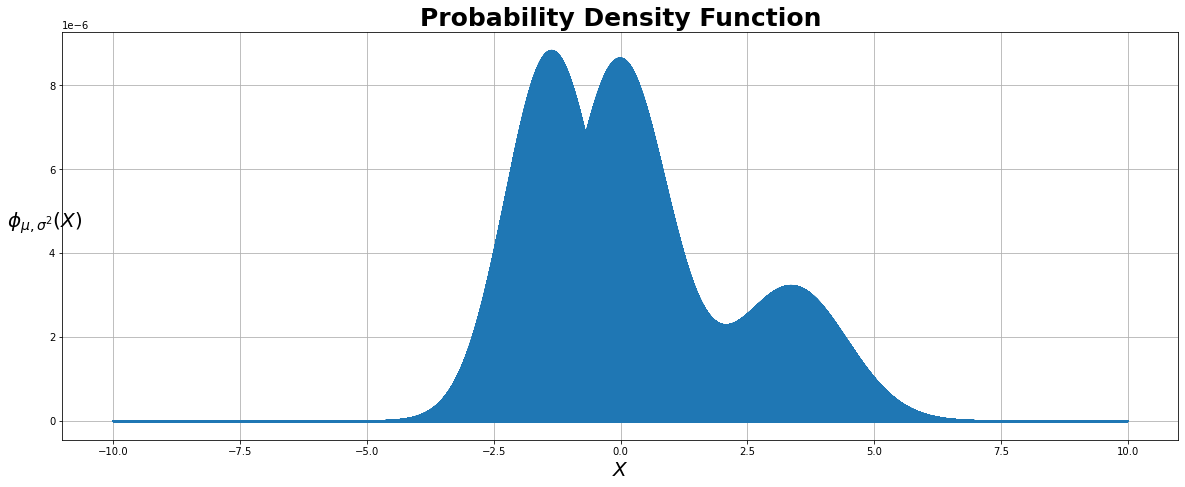

In [17]:
plt.figure(figsize=(20, 7.5))
plt.plot(X_full[:, 0], pdf_probas)
plt.title('Probability Density Function',fontweight='bold', fontsize= 25)
plt.xlabel('$X$', fontsize= 20)
plt.ylabel('$\phi_{\mu, \sigma^2}(X)$', fontsize= 20, rotation=0)
plt.grid()

# Great! This is the PDF graph of the 3 clusters, you can clearly see where the GMM has calculated the centroid to be, $\mu$, and the Covariance (i.e. Standard Deviation), $\Sigma$. Integrate under the graph is equal to one.
Note the y axis size. 

### In reality, the Gaussian Mixture Model may struggle with higher dimensional data and identify the number of correct clusters. The Expectation Maximization (EM) algorithm may struggle to converge to the optimal solution, that is why it is important you check convergence with the .converged_ attribute. 

#### When the data is higher dimensional, you may want to reduce the difficulty by limiting parameters the number of parameters that the algorithm has to learn, i.e. Covariance matrix, limit the range of shapes, orientations. By setting covariance_type to the following:
- 'spherical' - all clusters must be spherical with different diameters
- 'diag' - all clusters take ellipsoidal shapes with different sizes but the matrix must only be diagonal. 
- 'tied' - all clusers take the same shape, size and oreintation - i.e. the same covariance matrix
- 'full' - default value, clusters can take any shape, size and orientation

In [18]:
import matplotlib.cm as cm

def plot_centroids(centroids, weights):
    centroids_centres = centroids[weights > weights.max()/10]
    plt.scatter(centroids_centres[:, 0], centroids_centres[:, 1], marker= 'o', s=150, color= 'y', zorder= 11, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker= 'x', s=100, color= 'r', zorder=11, linewidths=50)

def plot_gaussian_mixture(cluster_model, X, resolution=1000):
    minimum= X.min(axis=0) #minimum value of X
    maximum = X.max(axis=0) #maximum value of X
    
    #create a meshgrid of across the data to obtain the decision boundary - uncomment below to see result
    XX, yy = np.meshgrid(np.linspace(minimum[0], maximum[0], resolution), np.linspace(minimum[1], maximum[1], resolution))
    
    #samples_score gives negative values to make this positive
    #np.c_ combines XX, yy by columns, giving 2 columns with XX, YY values
    Z = -cluster_model.score_samples(np.c_[XX.ravel(), yy.ravel()])
    
    #reshape to the same size as XX
    Z = Z.reshape(XX.shape)
    
    plt.contourf(XX, yy, Z, cmap='Blues')
    
    plt.contourf(XX, yy, Z, cmap='Blues')
    
    #the 'height' of the predict
    Z =cluster_model.predict(np.c_[XX.ravel(), yy.ravel()])
    Z =Z.reshape(XX.shape)
    
    #plot decision boundary lines
    plt.contour(XX, yy, Z, linewidths=6, colors= 'r', linestyles= 'dashed')
#     plt.contour(XX, yy, Z, linewidths=6, colours= 'g', linestyles= 'dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k*', markersize=2)
    
    #plot centroids
    plot_centroids(cluster_model.means_, cluster_model.weights_)
    
    plt.title('GMM with decision boundary, convariance type = ' + cluster_model.covariance_type,
              fontweight='bold', fontsize= 15)
    plt.xlabel('$X_1$', fontsize= 20)
    plt.ylabel('$X_2$', fontsize= 20, rotation=0)
    ax= plt.gca()

In [19]:
# X_full.max(axis=0)

In [20]:
# np.meshgrid(np.linspace(-1,1,11), np.linspace(-1, 1, 11))[0]#.ravel()

In [21]:
# np.c_[np.meshgrid(np.linspace(-1,1,11), np.linspace(-1, 1, 11))[0].ravel(), np.meshgrid(np.linspace(-1,1,11), np.linspace(-1, 1, 11))[1].ravel()]

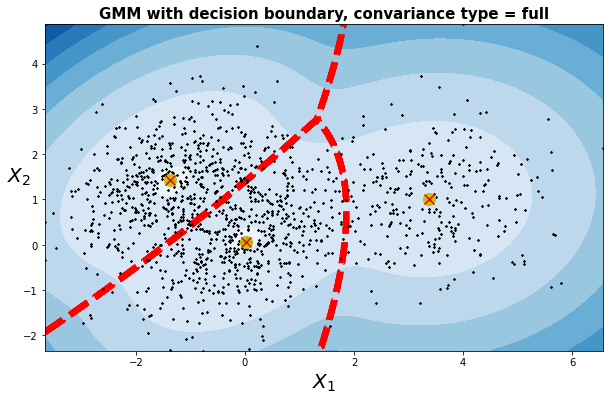

In [22]:
plt.figure(figsize= (10, 6))
plot_gaussian_mixture(gm, X)

In [23]:
# gm.means_[gm.weights_ > gm.weights_.max()/10][:, 1]

## Now lets use the function to see what happens when we plot for different covariance types. 
Spherical, diag, tied, full

In [24]:
from sklearn.mixture import GaussianMixture

gm_spherical = GaussianMixture(random_state=42, covariance_type='spherical', n_init=10, n_components=3)
gm_diag = GaussianMixture(random_state=42, covariance_type='diag', n_init=10, n_components=3)
gm_tied = GaussianMixture(random_state=42, covariance_type='tied', n_init=10, n_components=3)
gm_full = GaussianMixture(random_state=42, covariance_type='full', n_init=10, n_components=3)

gm_spherical.fit(X)
gm_diag.fit(X)
gm_tied.fit(X)
gm_full.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

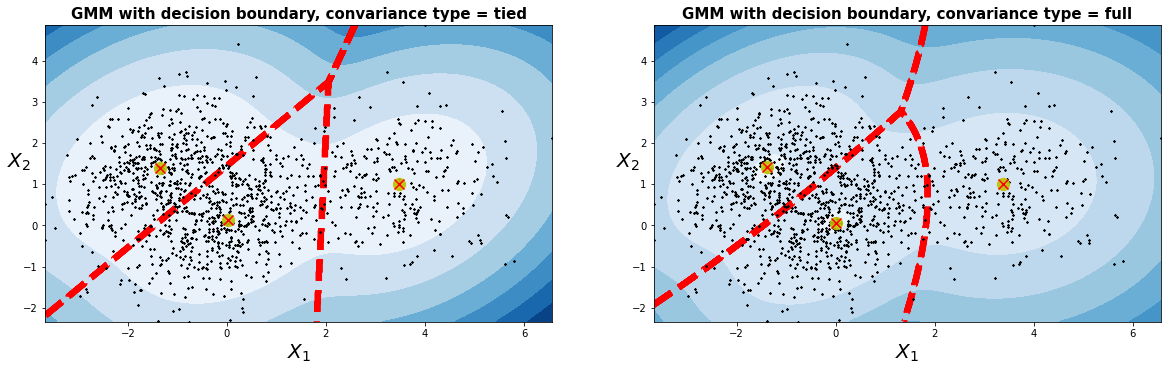

In [25]:
plt.figure(figsize= (20, 12))

plt.subplot(221)
plot_gaussian_mixture(gm_tied, X)

plt.subplot(222)
plot_gaussian_mixture(gm_full, X)

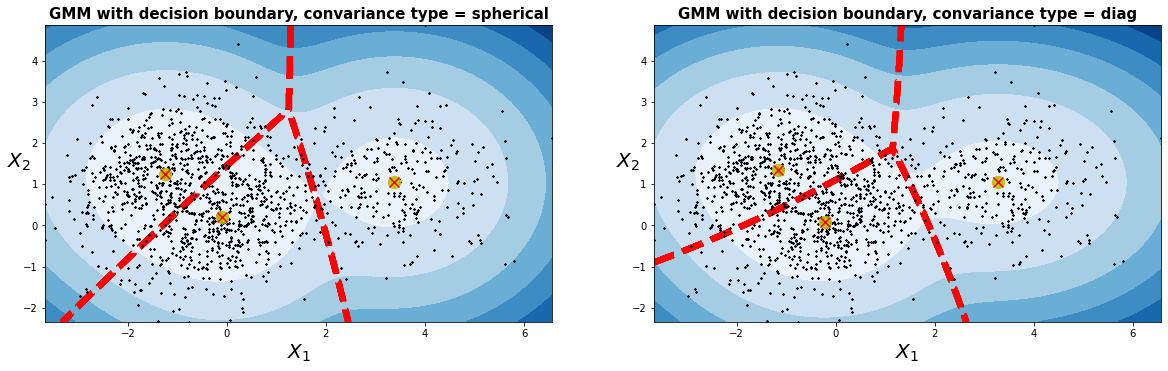

In [26]:
plt.figure(figsize= (20, 12))

plt.subplot(221)
plot_gaussian_mixture(gm_spherical, X)

plt.subplot(222)
plot_gaussian_mixture(gm_diag, X)

### Although, it does not look like it, changing the covariance type changes the decision boundary dramtically. 

The GMM computationally complexity depends on a number of clusters (n_components), covariance matrix (i.e. type), number of instances and number of dimensions. GMM does not scale well with large numbers of features. 

# Anomaly Detection Using Gaussian Mixtures
Also called outlier detection. 

GMM can be used to detect instances that deviate from the norm (i.e. detects anomalies and outliers). This can be useful for fraud detection and detecting defective equipment in a production line. More importantly, it can help remove anomalies before training another model, this will help improve the model's score.

To detect anomalies in GMM you need to <b>set the density threshold</b>.
For Example:
In a production line the known defective rate is 4%. So you should set that threshold to that value.
If the reported false positives (i.e. good products reported as defective) then you should decrease the value.
If the reported false negatives (i.e. bad products slip through the production line) then you should increase the value.

<b>There is a precision/recall trade off.</b>

In [30]:
#return log probabilities of each value of X

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) #4th percentile
density_threshold

-5.473223387299634

In [32]:
# values less than the 4th percentiles are anomalies
anomalies = X[densities < density_threshold]
anomalies

array([[ 0.59195634,  3.6057413 ],
       [ 2.39683884, -1.29455709],
       [ 1.56196717, -1.79127663],
       [-2.84364324, -1.54919521],
       [-3.66852814, -0.3429737 ],
       [-0.83203145,  3.72786751],
       [ 0.22339358,  4.39490771],
       [-0.79455054,  3.62702102],
       [ 0.06944133, -2.297334  ],
       [-0.974437  ,  3.6848641 ],
       [-2.97020235, -1.72201813],
       [-2.61153463, -0.9838591 ],
       [-1.38134412, -2.32858533],
       [-3.47196066, -0.0727791 ],
       [ 0.3107928 , -2.00500715],
       [-2.73027234,  2.92931248],
       [-3.67195266,  0.50814845],
       [ 0.3281456 , -1.78591826],
       [-2.81901936, -1.62737759],
       [-1.78635028, -1.9396529 ],
       [ 0.33010369, -2.11166504],
       [-1.37239541,  3.56806543],
       [-0.7634613 , -2.33445961],
       [-2.61760696,  3.10973967],
       [ 4.89359669, -0.38756493],
       [ 4.93207567, -0.42157602],
       [ 2.17056917,  2.84574489],
       [ 5.80546094, -0.85297906],
       [ 5.68060531,

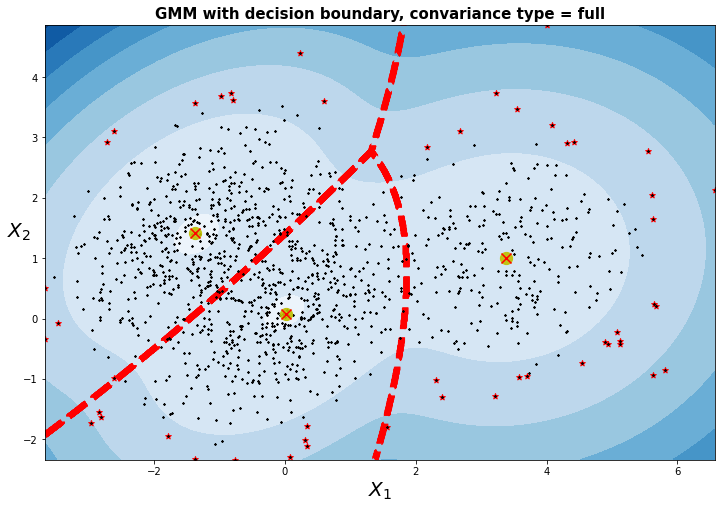

In [40]:
plt.figure(figsize=(12, 8))

plot_gaussian_mixture(gm, X)

#plot anomalies 
plt.scatter(anomalies[:,0], anomalies[:,1], color='r', marker='*')
